# Plotting covid data for US

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina" #. this will give quality plots
plt.style.use('ggplot')

# Johns Hopkins Corona Virus Data

In [26]:
url = "https://raw.githubusercontent.com/CSSEGISandData/Covid-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

In [27]:
data = pd.read_csv(url) # read the data into the pandas dataframe

In [28]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,215,216,216,216,216,216,216,216,216,216
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,680,680,680,680,680,680,680,680,680,680
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,98,98,98,98,98,98,98,98,98,98
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,104,104,104,104,104,104,104,104,104,104
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,243,243,243,243,243,243,243,243,243,243


In [29]:
# We extract the column data starting at March 1, 2020
data_m = data.loc[:,'3/1/20':]

In [30]:
# total deaths of each day (column)
deaths = data_m.sum()

In [31]:
deaths[:7] #  notice deaths is a pandas series giving the cumulative deaths

3/1/20     2
3/2/20     7
3/3/20     8
3/4/20    12
3/5/20    13
3/6/20    15
3/7/20    18
dtype: int64

In [32]:
# to get the deaths of each day we do first difference
daily = np.diff(deaths)
daily = np.insert(daily,0,1) # fix March 1
daily[:10] #  We interpret below to say 5 deaths occured on March 2

array([1, 5, 1, 4, 1, 2, 3, 4, 2, 5])

<BarContainer object of 796 artists>

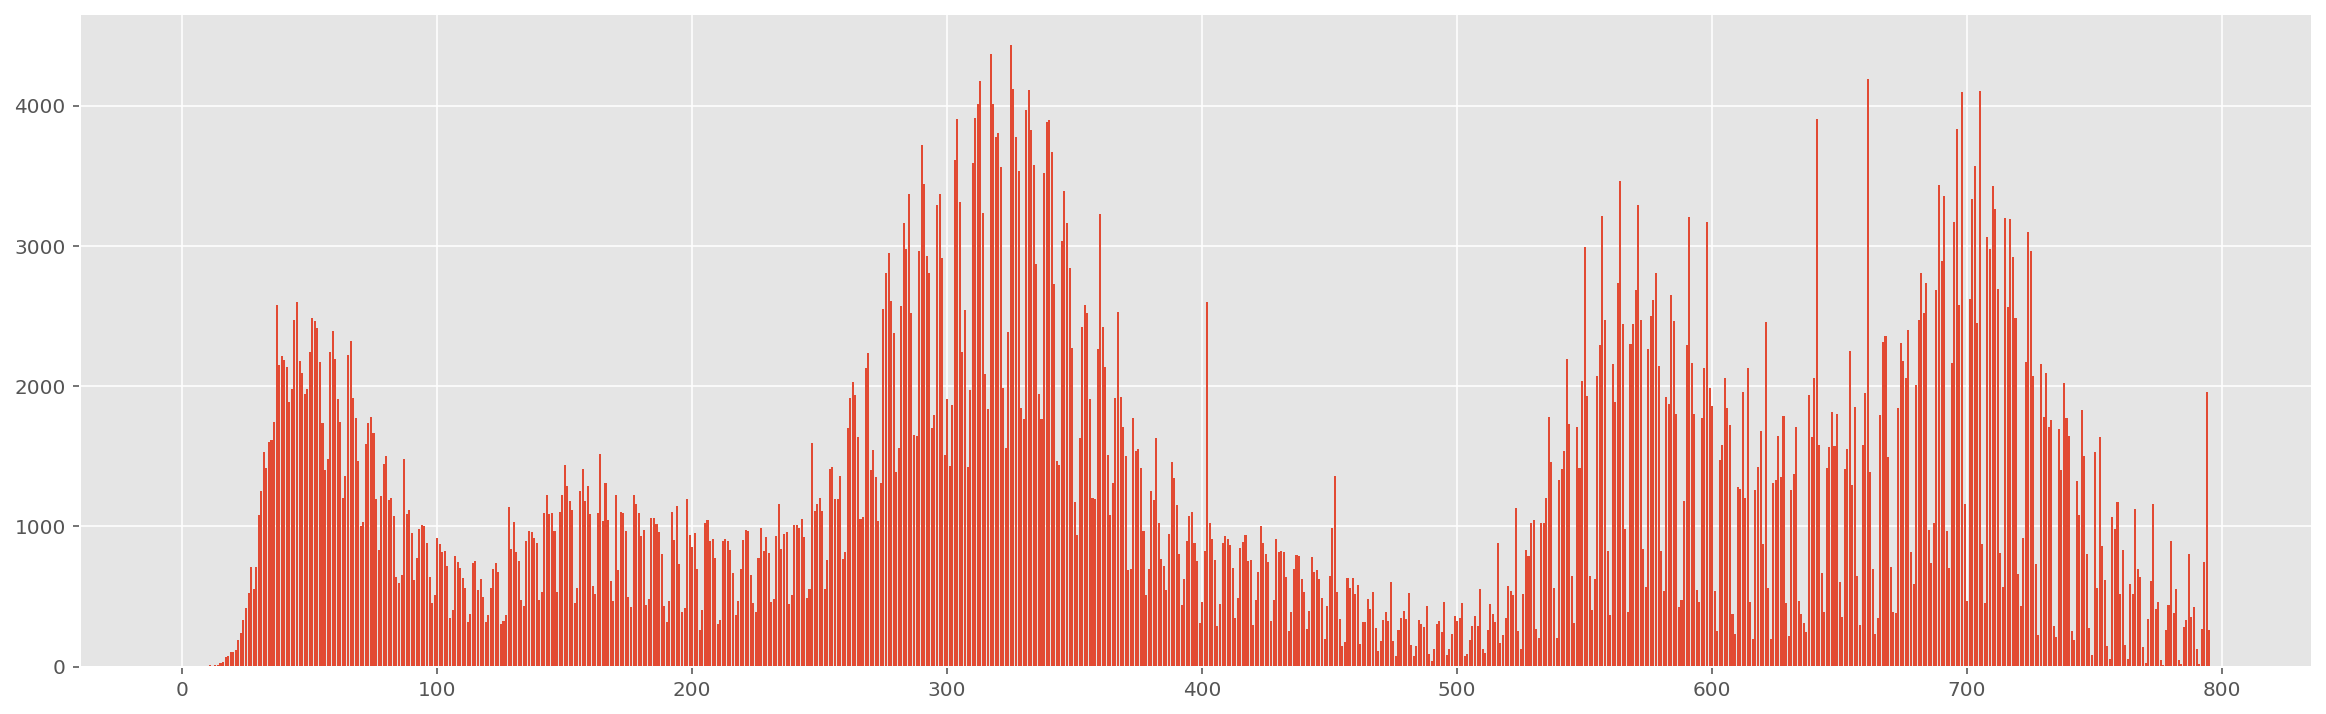

In [33]:
# plot the data
x = np.arange(len(daily))
plt.figure(figsize=(20,6))
plt.bar(x,daily)

In [34]:
# Find 7 day moving average
w = 1/7 * np.ones(7)
mov_avg = np.convolve(daily,w,'valid')

In [35]:
(len(daily),len(mov_avg))

(796, 790)

In [36]:
#  pad some zeros
mov_avg = np.hstack((np.zeros(6),mov_avg))

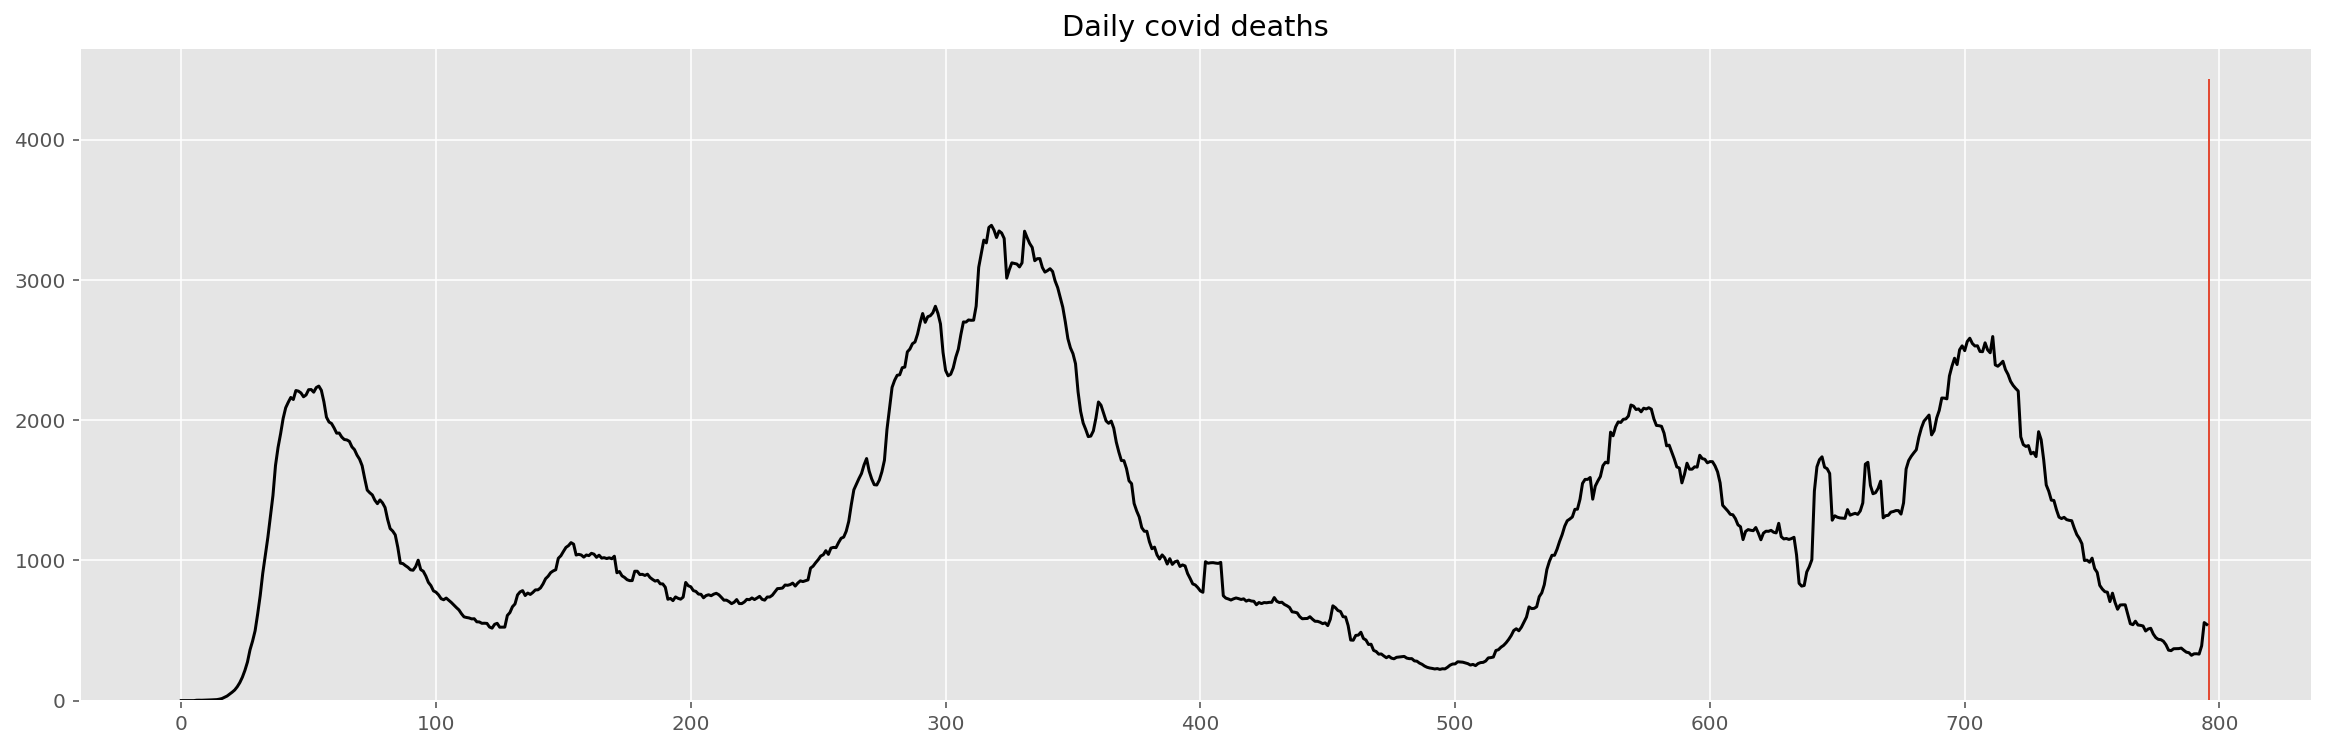

In [37]:
# plot the data with the moving average
x = np.average(len(daily))
plt.figure(figsize=(20,6))
plt.bar(x,daily)
plt.plot(mov_avg,c='k')
plt.title('Daily covid deaths');

# Make a new dataframe with two columns showing cumulative and daily deaths

In [43]:
df = pd.DataFrame({"cumulative":deaths.values, "daily":daily}, index=deaths.index)
df[:15].T

,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
cumulative,2,7,8,12,13,15,18,22,24,29,34,45,52,61,72
daily,1,5,1,4,1,2,3,4,2,5,5,11,7,9,11


# Now we want the x-axis to display dates

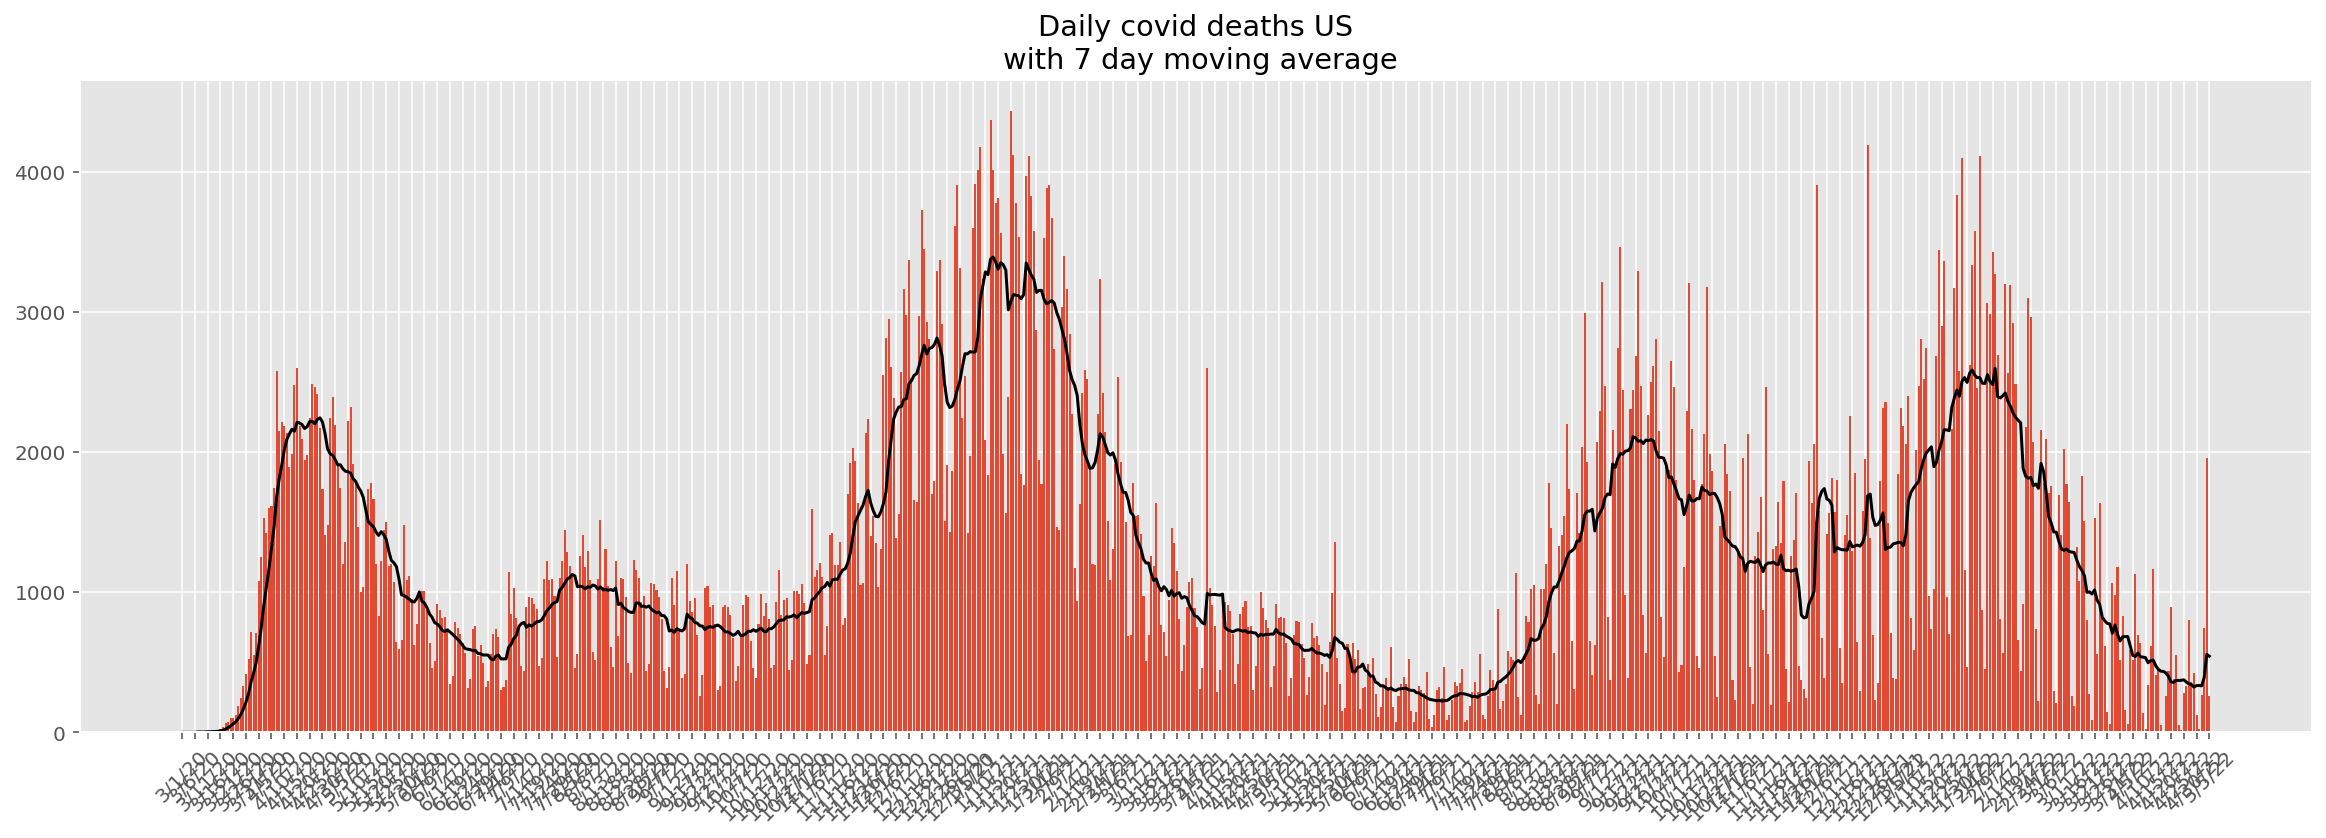

In [44]:
plt.figure(figsize=(20,6))
plt.bar(df.index,df['daily'])
plt.plot(mov_avg,c = 'k')
loc,labels = plt.xticks()
plt.xticks(np.arange(len(mov_avg))[::5],rotation=45);
plt.title('Daily covid deaths US\n with 7 day moving average');
plt.savefig('covid.png')

In [45]:
plt.savefig('covid.png')

<Figure size 432x288 with 0 Axes>

In [47]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p -wget, pandas, numpy, matplotlib, watermark

#  date
print (" ")
%watermark -u -n -t -z

ModuleNotFoundError: No module named 'watermark'